# midterm coding

**info**

Sujinhua 2017201620

# auxfuc

In [118]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
def timeit(func):
    def wrapper(*args):
        start = time.time()
        res = func(*args)
        end = time.time()
        return res,end-start
    return wrapper
def draw_time_complexity(wrapped_func,baseline,start,end,step):
    n_list,base_t,t_list = [],[],[]
    for i in range(start,end,step):
        n_list.append(i)
        base_t.append(baseline(i))
        t_list.append(wrapped_func(i)[1])
    plt.plot(n_list, base_t, color="red", label="baseline")
    plt.plot(n_list, t_list, color="blue", label="my solution")
    plt.xlabel("n")
    plt.ylabel("Time(ms)")
    plt.legend()

# Question 3

**brief anlysis**

It is a task to calculate sum of all continuous subsuquences of an array A and save it in a matrix B. The naive way ignores the relation of the matrix elements and use $\Theta(n)$ to calculate matrix element each time. So totally it will take $\Theta(n^3)$ basic operation. I find the relation of matrix elements shown in the following and use this to save calculating time.

$$B[i,j] = B[i+1,j]-A[i]=B[i,j+1]+A[j] ,where i >= j$$

Using this equation, we can get first column by n times multiplication operation, then we use fist column minus A[0] to obtain the second column. Consider duplicate the symmetry elements in the matrix, We can only use total n^2 operations to get the final result.


In [105]:
@timeit
def question3(n):
    a = [random.uniform(0,10) for i in range(n)]
    B = [[0]*n for i in range(n)]
    for i in range(10):
        for j in range(i,n):
            if i == j:
                B[j][i] = a[j] 
            else:
                if i == 0:
                    B[j][i] = B[j-1][i] + a[j]
                    B[i][j] = B[j][i]
                else:
                    B[j][i] = B[j][i-1] - a[i-1]
                    B[i][j] = B[j][i]
    return (a,B)
res = question3(5)
print('cost time:',res[1])
print(res[0][0])
res[0][1]

cost time: 2.5987625122070312e-05
[0.8251909552003733, 3.9477158730078363, 4.141808125559678, 0.5154978937924359, 6.378069865081956]


[[0.8251909552003733,
  4.772906828208209,
  8.914714953767888,
  9.430212847560323,
  15.80828271264228],
 [4.772906828208209,
  3.9477158730078363,
  8.089523998567515,
  8.60502189235995,
  14.983091757441906],
 [8.914714953767888,
  8.089523998567515,
  4.141808125559678,
  4.657306019352114,
  11.035375884434071],
 [9.430212847560323,
  8.60502189235995,
  4.657306019352114,
  0.5154978937924359,
  6.893567758874393],
 [15.80828271264228,
  14.983091757441906,
  11.035375884434071,
  6.893567758874393,
  6.378069865081956]]

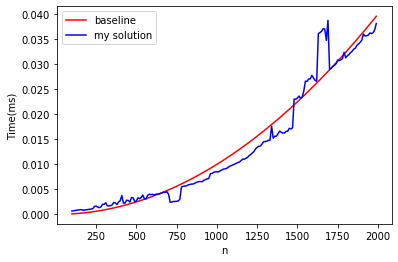

In [113]:
draw_time_complexity(question3,lambda x:(x*1e-4)**2,100,2000,10)

# Question 4

**brief analysis**

**divide and conquer**

The key point of this question is to how to define the sub-problem. If using thought of divide and conquer, it can be easily considered that split the sequence A into several pieces and find the best jaundiced subsequence of each piece. It can be proved that if two known subsequence can be combined based on some rules. Let;s define the best jaundiced subsequence, left best jaundiced subsequence has a limit that there will be no left elements got rid. Suppose that the left and right number of best sequence of A(i,j) are k_left and k_right, where i <= k_left <= k_right <= j. Note the reward of best sequence of A(i,j) is R(i,j). The reward of right best sequence of A(i,j) is max(max(R(i,j)+sum(A(k_right,j)),0) , max_k{sum(A(k,j))}). And we could use it to judge the the new best subsequence of two known sequence A(i,j) and A(j+1,k). The judge rule is in the following.
$$max(R(i,j),R(j+1,k),R_{right}(i,j)+R_{left}(j+1,k))$$



In [120]:
class sequence(object):
    def __init__(self,number):
        self.left,self.right = number,number
        self.best_left = number
        self.best_right = number 
        self.reward = a[number]
    def combine_right(self,right_sequence):
        r1,k1 = self.cal_jaundiced('left')
        r2,k2 = right_sequence.cal_jaundiced('right')
        combine_reward =  r1 + r2
        self.right = right_sequence.right
        if combine_reward > self.reward and combine_reward > right_sequence.reward:
            self.reward = combine_reward
            self.best_right = k2 if k2 != -1 else right_sequence.best_right
            if k1 != -1:
                self.best_left = k1
        elif r1 <= r2:
            return right_sequence
        return self
    def cal_jaundiced(self,direction):
        k,max_ = -1,0
        if direction == 'right':
            if self.right == self.best_right or self.best_right == -1:
                return self.reward,k
            else:
                sum_ = 0
                for i in range(self.right,self.best_right,-1):
                    sum_  += a[i]
                    if sum_ > max_:
                        max_,k = sum_,i
        else:
            if self.left == self.best_left or self.best_left == -1:
                return self.reward,k
            else:
                sum_ = 0
                for i in range(self.left,self.best_left,1):
                    sum_  += a[i]
                    if sum_ > max_:
                        max_,k = sum_,i
        if max_ > self.reward + sum_:
            return max_,k
        else:
            return self.reward+sum_,-1
        
@timeit
def question4_1(n):
    global a
    a = [random.uniform(-20,20) for i in range(n)]
    queue = [sequence(i) for i in range(len(a))]
    while len(queue) > 1:
        left,right = queue.pop(0),queue.pop(0)
        if left.right > right.left:
            queue.append(left)
            left, right = right, queue.pop(0)
        queue.append(left.combine_right(right))
    res = queue.pop()
    return res
res = question4_1(10)
print('time_cost: %s\n' %res[1],\
      'total reward: %s \n' % res[0].reward,\
      'best subsequence: (%s,%s)' % (res[0].best_left,res[0].best_right) )
a

time_cost: 5.9604644775390625e-05
 total reward: 62.85583341417278 
 best subsequence: (2,9)


[-18.94554395593183,
 -8.271472919228273,
 11.09357527488907,
 10.373924269425952,
 16.013043547076364,
 -12.548194638778952,
 -3.1654035703505983,
 6.619117836106739,
 5.114286905049205,
 13.641885581625452]

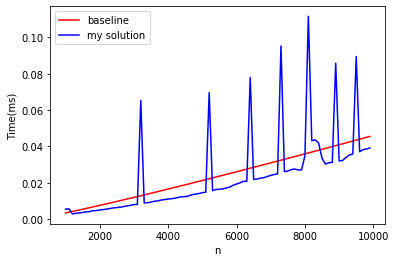

In [127]:
draw_time_complexity(question4_1,lambda x:x*0.5e-6 * np.log(x),1000,10000,100)

**Dynamic programming**

In fact, divide and conquer method seems weak in this context since middle value in the sequence has less influence for the final result. So the problem is similar like elimination game or gluttonous game. When two number nearby and have the same sign, both positive or negative, just combine them. When meeting different sign triple like (positive1, negative, positive2) or (negative1,positive,negative2). If abs(middle) < min{abs(left),abs(right)}, combine three items. If min{abs(left),abs(right)} < abs(middle) < max{abs(left),abs(right)}, combine middle and min_one. In the end, above operation can not be used anymore, then select the biggest possitive one in the list.


In [138]:
@timeit
def question4_2(n):
    a = [random.uniform(-20,20) for i in range(n)]
    stack = [a[0]]
    pos = [[0,0]]
    for i in range(1,len(a)):
        new = a[i]
        if len(stack)>0:
            pop = stack.pop()
        else:
            stack.append(new)
            pos.append([i,i])
            continue
        if new * pop >= 0:
            stack.append(pop+new)
            pos[-1][1] = i
        elif len(stack) > 0:
            pop2 = stack.pop()
            if pop2 * new >= 0:
                if abs(pop2) >= abs(pop):
                    if abs(pop) <= abs(new):
                        stack.append(pop2  + pop + new)
                        pos.pop()
                        pos[-1][1] = i
                    else:
                        stack.extend([pop2+pop,new])
                        pos[-2][1] = pos[-2][1]
                        pos[-1] = [i,i]
                else:
                    stack.extend([pop2,pop,new])
                    pos.append([i,i])
            else:
                stack.extend([pop2+pop,new])
                pos[-2][1] = pos[-2][1]
                pos[-1] = [i,i]
        else:
            stack.extend([pop,new])
            pos.append([i,i])
    return (a,stack,pos)
res = question4_2(10)
print('time cost: %s \n'%res[1],\
     'a: %s \n'%res[0][0],
     'stack: %s \n'%res[0][1],
     'pos: %s \n'%res[0][2])

time cost: 4.0531158447265625e-05 
 a: [-3.330346487283631, -7.894926817261268, 14.416424565265594, -1.4354883489428047, -15.16644067402936, 1.298466922174132, -1.9066574278396509, 10.95486354265358, 10.547961401258217, -9.941057862580504] 
 stack: [-11.2252733045449, 14.416424565265594, -17.210119528637684, 21.502824943911797, -9.941057862580504] 
 pos: [[0, 1], [2, 2], [3, 6], [7, 8], [9, 9]] 



**explain how to deal with the result**

Indeed we get the stack containing the best sequence total reward we want. So we just need $\Theta(n)$ time to find the maxiumn element and corresbonding pos element. In above example, the best subsequence is 7-8.

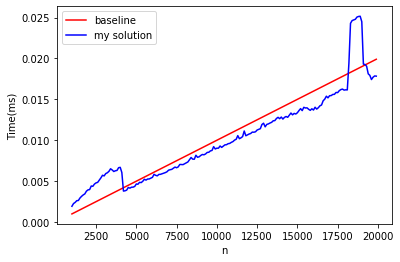

In [142]:
draw_time_complexity(question4_2,lambda x:x*1e-6,1000,20000,100)

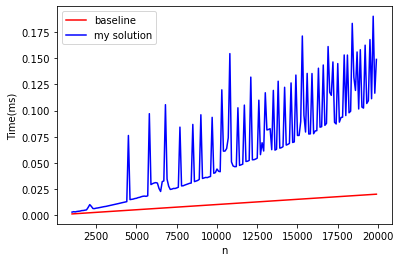

In [143]:
draw_time_complexity(question4_1,lambda x:x*1e-6,1000,20000,100)

**in contrast**

For sure, DP is log(n) faster than divide and conquer in this question.

# Question 5 

**brief analysis**

Indeed this question is extremely 2-dimension dynamic programming. There is an explicit recusive formulation shown in the following.

$$C(i,j) = max(C(i-1,j),C(i,j-1)) + A(i,j)$$

In [62]:
A = [[0,0,0,0,1,0],
     [0,1,0,1,0,0],
     [0,0,0,1,0,1],
     [0,0,1,0,0,1],
     [1,0,0,0,1,0]]

In [69]:
import copy
C = copy.deepcopy(A)

In [75]:
for i in range(len(A)):
    for j in range(len(A[0])):
        if i == 0 or j == 0:
            if i == j:
                C[i][j] = [A[i][j],[(i,j)]]
            elif i == 0:
                C[i][j] = [C[i][j-1][0] + A[i][j],C[i][j-1][1] + [(i,j)]]
            else:
                C[i][j] = [C[i-1][j][0] + A[i][j],C[i-1][j][1] + [(i,j)]]
        else:
            if C[i][j-1][0] >= C[i-1][j][0]:
                C[i][j] = [C[i][j-1][0] + A[i][j],C[i][j-1][1] + [(i,j)]]
            else: 
                C[i][j] = [C[i-1][j][0] + A[i][j],C[i-1][j][1] + [(i,j)]]
C[len(A)-1][len(A[0])-1]

[5,
 [(0, 0),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 3),
  (2, 4),
  (2, 5),
  (3, 5),
  (4, 5)]]